In [14]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           # Install Vader if not already installed
!pip install vaderSentiment

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Load the dataset
df = pd.read_csv('tweets-data.csv')

# Preview and sample
print("Original dataset size:", df.shape)
df_sample = df.sample(n=500, random_state=42).copy()
df_sample.head()


Original dataset size: (3010, 6)


,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag
2899,897,2023-06-25 11:06:23+00:00,2,NaN,Le #DessinDePresse de Sanaga : ls sont morts c...,titan
594,594,2023-06-25 18:23:19+00:00,0,NaN,#Russia #Wagner #RussiaCivilWar https://t.co/P...,wagner
2870,868,2023-06-25 11:32:00+00:00,1,NaN,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,titan
52,52,2023-06-25 19:11:12+00:00,21,NaN,Auch heute geht die politische Nachricht des T...,wagner
1391,390,2023-06-25 16:21:52+00:00,1,NaN,@crazyclipsonly Same type that would take a ho...,titanic


In [17]:
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # remove @ and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # keep only letters
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(cleaned_tokens)

df_sample['cleaned_text'] = df_sample['Tweets'].apply(clean_tweet)
df_sample[['Tweets', 'cleaned_text']].head()

,Tweets,cleaned_text
2899,Le #DessinDePresse de Sanaga : ls sont morts c...,dessindepresse sanaga sont morts comme ils ont...
594,#Russia #Wagner #RussiaCivilWar https://t.co/P...,russia wagner russiacivilwar
2870,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,exclusive content cosplay japan titan titanics...
52,Auch heute geht die politische Nachricht des T...,auch heute geht die politische nachricht des t...
1391,@crazyclipsonly Same type that would take a ho...,type would take homemade playstationcontrolled...


In [18]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        label = 'Positive'
    elif score <= -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'
    return pd.Series([label, score])


In [20]:
df_sample[['sentiment', 'sentiment_score']] = df_sample['cleaned_text'].apply(get_sentiment)
df_sample[['Tweets', 'cleaned_text', 'sentiment', 'sentiment_score']].head(10)

,Tweets,cleaned_text,sentiment,sentiment_score
2899,Le #DessinDePresse de Sanaga : ls sont morts c...,dessindepresse sanaga sont morts comme ils ont...,Positive,0.4767
594,#Russia #Wagner #RussiaCivilWar https://t.co/P...,russia wagner russiacivilwar,Neutral,0.0000
2870,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,exclusive content cosplay japan titan titanics...,Negative,-0.4404
52,Auch heute geht die politische Nachricht des T...,auch heute geht die politische nachricht des t...,Negative,-0.5994
1391,@crazyclipsonly Same type that would take a ho...,type would take homemade playstationcontrolled...,Neutral,0.0000
807,#SUGA_AgustD_TOUR_in_Seoul #SUGA_AgustD_TOUR #...,sugaagustdtourinseoul sugaagustdtour glastonbu...,Neutral,0.0000
2761,#Titan mishap: #Implosion with incredible forc...,titan mishap implosion incredible force amp sp...,Negative,-0.5859
196,#Wagner #Russia,wagner russia,Neutral,0.0000
1576,#merri le #titanic 2 le retour https://t.co/4s...,merri titanic retour via,Neutral,0.0000
670,"Il Segretario di Stato americano #Blinken: ""no...",segretario stato americano blinken non credo c...,Neutral,0.0000


/tmp/ipython-input-21-4146789440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sample, x='sentiment', palette='pastel')


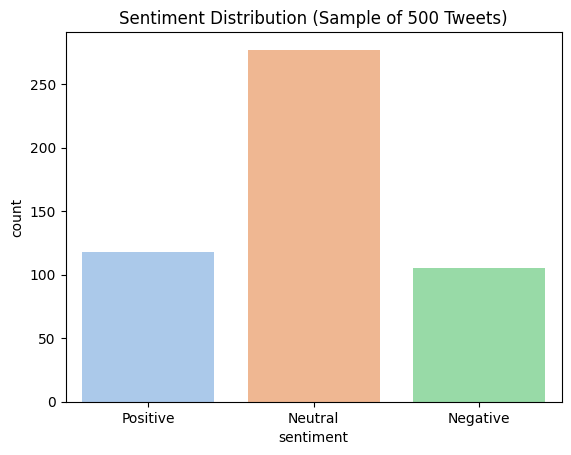

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.countplot(data=df_sample, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution (Sample of 500 Tweets)')
plt.show()
